In [334]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [335]:
dataset = pd.read_csv("ekspor_jabar.csv")
dataset

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,32,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,32,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,32,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,32,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,32,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...,...
485,486,32,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",326742485,US DOLLAR,2020
486,487,32,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,32,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020
488,489,32,JAWA BARAT,98,PEBT,0,US DOLLAR,2020


In [336]:
is_na = dataset.isna().any(axis=1) #identifikasi data kosong
dataset.loc[is_na]


,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun


In [337]:
dataset_any = dataset.dropna(axis=1, how='all') #all vertical
dataset_any.shape[0]

dataset_any

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,32,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,32,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,32,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,32,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,32,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...,...
485,486,32,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",326742485,US DOLLAR,2020
486,487,32,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,32,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020
488,489,32,JAWA BARAT,98,PEBT,0,US DOLLAR,2020


In [338]:
duplicated = dataset_any.append(dataset.iloc[[-2]]) #menghapus data yang duplikat
duplicated

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,32,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,32,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,32,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,32,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,32,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...,...
486,487,32,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,32,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020
488,489,32,JAWA BARAT,98,PEBT,0,US DOLLAR,2020
489,490,32,JAWA BARAT,99,PARCEL AND RETURN GOODS N.C.A.K.,10105991,US DOLLAR,2020


In [339]:
duplicated_dataset = duplicated.duplicated()
duplicated_dataset

0      False
1      False
2      False
3      False
4      False
       ...  
486    False
487    False
488    False
489    False
488     True
Length: 491, dtype: bool

In [340]:
duplicated.drop(duplicated[duplicated_dataset].index)

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,32,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,32,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,32,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,32,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,32,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...,...
484,485,32,JAWA BARAT,94,"FURNITURE, BEDDING, LAMPS, ILLUM. SIGNS",569891318,US DOLLAR,2020
485,486,32,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",326742485,US DOLLAR,2020
486,487,32,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,32,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020


In [341]:
dataset_duplicated_free = dataset.drop_duplicates()
dataset_duplicated_free

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,32,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,32,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,32,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,32,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,32,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...,...
485,486,32,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",326742485,US DOLLAR,2020
486,487,32,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,32,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020
488,489,32,JAWA BARAT,98,PEBT,0,US DOLLAR,2020


In [342]:
dataset.drop(["kode_provinsi"], axis=1, inplace = True) #menghapus kolom kode_provinsi
dataset

,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...
485,486,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",326742485,US DOLLAR,2020
486,487,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020
488,489,JAWA BARAT,98,PEBT,0,US DOLLAR,2020


In [343]:
data16 = dataset[(dataset['tahun'] == 2016)] #menampilkan data pada tahun 2016
data16

,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
0,1,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016
1,2,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016
2,3,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016
3,4,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016
4,5,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016
...,...,...,...,...,...,...,...
93,94,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",252192162,US DOLLAR,2016
94,95,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,214481359,US DOLLAR,2016
95,96,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,386129,US DOLLAR,2016
96,97,JAWA BARAT,98,PEBT,48437,US DOLLAR,2016


In [344]:
data16['Ranking']=data16['nilai_ekspor'].rank(ascending=0,method='dense') #menambahkan ranking pada tahun 2016
data16

<ipython-input-344-25948bf356a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data16['Ranking']=data16['nilai_ekspor'].rank(ascending=0,method='dense') #menambahkan ranking pada tahun 2016


,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun,Ranking
0,1,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016,88.0
1,2,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016,86.0
2,3,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016,43.0
3,4,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016,62.0
4,5,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016,85.0
...,...,...,...,...,...,...,...,...
93,94,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",252192162,US DOLLAR,2016,20.0
94,95,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,214481359,US DOLLAR,2016,25.0
95,96,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,386129,US DOLLAR,2016,89.0
96,97,JAWA BARAT,98,PEBT,48437,US DOLLAR,2016,94.0


In [345]:
dataset_top_10_16 = data16.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016
(data16.head(10))

<ipython-input-345-ec829a1ab12e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_10_16 = data16.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016


,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun,Ranking
83,84,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4024471113,US DOLLAR,2016,1.0
82,83,JAWA BARAT,84,MACHINERY,2545147789,US DOLLAR,2016,2.0
85,86,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,2258478787,US DOLLAR,2016,3.0
60,61,JAWA BARAT,61,KNITTED OR CROCHETED CLOTHES,1891936576,US DOLLAR,2016,4.0
61,62,JAWA BARAT,62,CLOTHES (NOT KNITTED OR CROCHETED),1507797066,US DOLLAR,2016,5.0
63,64,JAWA BARAT,64,FOOTWEAR,1447289695,US DOLLAR,2016,6.0
39,40,JAWA BARAT,40,RUBBER AND RUBBER ARTICLES,1378899943,US DOLLAR,2016,7.0
54,55,JAWA BARAT,55,MAN-MADE STAPLE FIBRES,1111827287,US DOLLAR,2016,8.0
47,48,JAWA BARAT,48,PAPER,844991133,US DOLLAR,2016,9.0
38,39,JAWA BARAT,39,PLASTIC & PLASTIC ARTICLES,800009362,US DOLLAR,2016,10.0


In [346]:
group = data16.groupby(['jenis_barang'])[['nilai_ekspor', 'tahun', 'Ranking']].sum().reset_index()
group

,jenis_barang,nilai_ekspor,tahun,Ranking
0,AIRCRAFT AND SPACECRAFT,102204636,2016,33.0
1,"ALBUMINOIDAL SUBSTANCES, MODIFIED STARCHES, GL...",9182025,2016,68.0
2,ALUMINIUM,56182961,2016,45.0
3,ARMS AND AMMUNITION,19185,2016,95.0
4,ARTICLES OF IRON OR STEEL,223145958,2016,23.0
...,...,...,...,...
93,WOOD,226157309,2016,22.0
94,WOOD PULP AND WASTE,362475,2016,90.0
95,"WOOL, ANIMAL HAIR AND WOVEN FABRIC",1405114,2016,81.0
96,WORKS OF ART AND ANTIQUES,386129,2016,89.0


Text(0.5, 1.0, 'Top 10 Nilai Ekspor Tahun 2016')

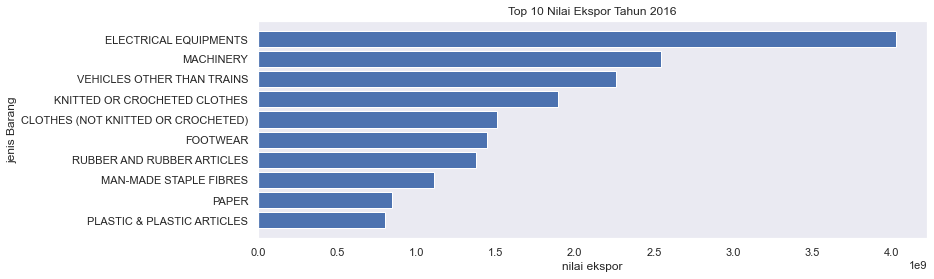

In [347]:
plt.figure(figsize=(12,4))
x = data16.sort_values(by='nilai_ekspor')['jenis_barang'].tail(10)
y = data16.sort_values(by='nilai_ekspor')['nilai_ekspor'].tail(10)
plt.barh(x,y)
plt.grid()
plt.ylabel('jenis Barang')
plt.xlabel('nilai ekspor')
plt.title('Top 10 Nilai Ekspor Tahun 2016')

In [348]:
data17 = dataset[(dataset['tahun'] == 2017)] #menampilkan data pada tahun 2017
data17

,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
98,99,JAWA BARAT,1,LIVE ANIMALS,1235232,US DOLLAR,2017
99,100,JAWA BARAT,2,MEAT,3015197,US DOLLAR,2017
100,101,JAWA BARAT,3,FISH,123240562,US DOLLAR,2017
101,102,JAWA BARAT,4,DAIRY PRODUCTS,13351994,US DOLLAR,2017
102,103,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,8751195,US DOLLAR,2017
...,...,...,...,...,...,...,...
191,192,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",318265636,US DOLLAR,2017
192,193,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,203485818,US DOLLAR,2017
193,194,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,184135,US DOLLAR,2017
194,195,JAWA BARAT,98,PEBT,0,US DOLLAR,2017


In [349]:
dataset_top_10_17 = data17.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016
(data17.head(10))

<ipython-input-349-5f66dbb158ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_10_17 = data17.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016


,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
183,184,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4497692614,US DOLLAR,2017
181,182,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4112883961,US DOLLAR,2017
180,181,JAWA BARAT,84,MACHINERY,3124117494,US DOLLAR,2017
158,159,JAWA BARAT,61,KNITTED OR CROCHETED CLOTHES,2182021949,US DOLLAR,2017
159,160,JAWA BARAT,62,CLOTHES (NOT KNITTED OR CROCHETED),1529892568,US DOLLAR,2017
161,162,JAWA BARAT,64,FOOTWEAR,1453771434,US DOLLAR,2017
137,138,JAWA BARAT,40,RUBBER AND RUBBER ARTICLES,1343492450,US DOLLAR,2017
152,153,JAWA BARAT,55,MAN-MADE STAPLE FIBRES,1141534885,US DOLLAR,2017
145,146,JAWA BARAT,48,PAPER,959489502,US DOLLAR,2017
136,137,JAWA BARAT,39,PLASTIC & PLASTIC ARTICLES,826934021,US DOLLAR,2017


In [350]:
group_2 = data17.groupby(['jenis_barang'])[['nilai_ekspor', 'tahun',]].sum().reset_index()
group_2

,jenis_barang,nilai_ekspor,tahun
0,AIRCRAFT AND SPACECRAFT,52358732,2017
1,"ALBUMINOIDAL SUBSTANCES, MODIFIED STARCHES, GL...",10522827,2017
2,ALUMINIUM,75276259,2017
3,ARMS AND AMMUNITION,17933,2017
4,ARTICLES OF IRON OR STEEL,270409788,2017
...,...,...,...
93,WOOD,224409880,2017
94,WOOD PULP AND WASTE,5115843,2017
95,"WOOL, ANIMAL HAIR AND WOVEN FABRIC",1006877,2017
96,WORKS OF ART AND ANTIQUES,184135,2017


Text(0.5, 1.0, 'Top 10 Nilai Ekspor Tahun 2017')

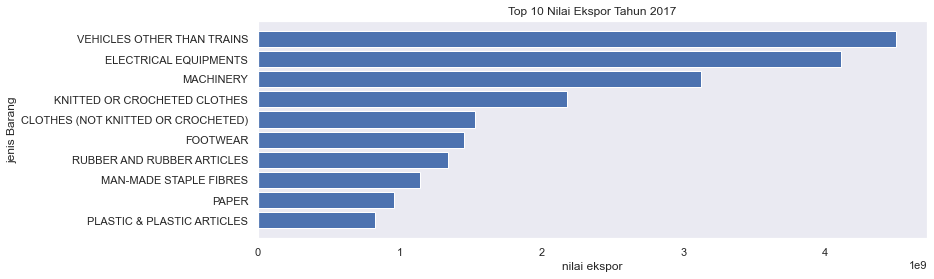

In [351]:
plt.figure(figsize=(12,4))
x = data17.sort_values(by='nilai_ekspor')['jenis_barang'].tail(10)
y = data17.sort_values(by='nilai_ekspor')['nilai_ekspor'].tail(10)
plt.barh(x,y)
plt.grid()
plt.ylabel('jenis Barang')
plt.xlabel('nilai ekspor')
plt.title('Top 10 Nilai Ekspor Tahun 2017')

In [352]:
data18 = dataset[(dataset['tahun'] == 2018)] #menampilkan data pada tahun 2018
data18

,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
196,197,JAWA BARAT,1,LIVE ANIMALS,1753869,US DOLLAR,2018
197,198,JAWA BARAT,2,MEAT,1741540,US DOLLAR,2018
198,199,JAWA BARAT,3,FISH,101426657,US DOLLAR,2018
199,200,JAWA BARAT,4,DAIRY PRODUCTS,20427837,US DOLLAR,2018
200,201,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,4575506,US DOLLAR,2018
...,...,...,...,...,...,...,...
289,290,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",340224312,US DOLLAR,2018
290,291,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,202229757,US DOLLAR,2018
291,292,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,273581,US DOLLAR,2018
292,293,JAWA BARAT,98,PEBT,0,US DOLLAR,2018


In [353]:
dataset_top_10_18 = data18.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016
(data18.head(10))

<ipython-input-353-3742240bda62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_10_18 = data18.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016


,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
281,282,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4565848805,US DOLLAR,2018
279,280,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4091298449,US DOLLAR,2018
278,279,JAWA BARAT,84,MACHINERY,3105110168,US DOLLAR,2018
256,257,JAWA BARAT,61,KNITTED OR CROCHETED CLOTHES,2326365496,US DOLLAR,2018
257,258,JAWA BARAT,62,CLOTHES (NOT KNITTED OR CROCHETED),1613025103,US DOLLAR,2018
259,260,JAWA BARAT,64,FOOTWEAR,1597466269,US DOLLAR,2018
235,236,JAWA BARAT,40,RUBBER AND RUBBER ARTICLES,1361525178,US DOLLAR,2018
250,251,JAWA BARAT,55,MAN-MADE STAPLE FIBRES,1156019663,US DOLLAR,2018
243,244,JAWA BARAT,48,PAPER,1120203185,US DOLLAR,2018
234,235,JAWA BARAT,39,PLASTIC & PLASTIC ARTICLES,859258905,US DOLLAR,2018


In [354]:
group_3 = data18.groupby(['jenis_barang'])[['nilai_ekspor', 'tahun',]].sum().reset_index()
group_3

,jenis_barang,nilai_ekspor,tahun
0,AIRCRAFT AND SPACECRAFT,81570666,2018
1,"ALBUMINOIDAL SUBSTANCES, MODIFIED STARCHES, GL...",10045284,2018
2,ALUMINIUM,168569202,2018
3,ARMS AND AMMUNITION,583165,2018
4,ARTICLES OF IRON OR STEEL,300187393,2018
...,...,...,...
93,WOOD,246960950,2018
94,WOOD PULP AND WASTE,20084499,2018
95,"WOOL, ANIMAL HAIR AND WOVEN FABRIC",653075,2018
96,WORKS OF ART AND ANTIQUES,273581,2018


Text(0.5, 1.0, 'Top 10 Nilai Ekspor Tahun 2018')

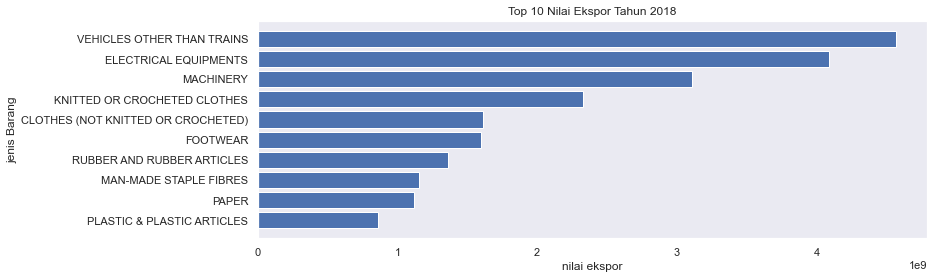

In [355]:
plt.figure(figsize=(12,4))
x = data18.sort_values(by='nilai_ekspor')['jenis_barang'].tail(10)
y = data18.sort_values(by='nilai_ekspor')['nilai_ekspor'].tail(10)
plt.barh(x,y)
plt.grid()
plt.ylabel('jenis Barang')
plt.xlabel('nilai ekspor')
plt.title('Top 10 Nilai Ekspor Tahun 2018')

In [356]:
data19 = dataset[(dataset['tahun'] == 2019)] #menampilkan data pada tahun 2019
data19

,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
294,295,JAWA BARAT,1,LIVE ANIMALS,1598855,US DOLLAR,2019
295,296,JAWA BARAT,2,MEAT,2084054,US DOLLAR,2019
296,297,JAWA BARAT,3,FISH,101555093,US DOLLAR,2019
297,298,JAWA BARAT,4,DAIRY PRODUCTS,54729572,US DOLLAR,2019
298,299,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,1594160,US DOLLAR,2019
...,...,...,...,...,...,...,...
387,388,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",346716382,US DOLLAR,2019
388,389,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,243614047,US DOLLAR,2019
389,390,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,242237,US DOLLAR,2019
390,391,JAWA BARAT,98,PEBT,0,US DOLLAR,2019


In [357]:
dataset_top_10_119 = data19.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016
(data19.head(10))

<ipython-input-357-aac5099e2292>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_10_119 = data19.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016


,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
379,380,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4643359777,US DOLLAR,2019
377,378,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,3935456341,US DOLLAR,2019
376,377,JAWA BARAT,84,MACHINERY,2872397632,US DOLLAR,2019
354,355,JAWA BARAT,61,KNITTED OR CROCHETED CLOTHES,2123801992,US DOLLAR,2019
355,356,JAWA BARAT,62,CLOTHES (NOT KNITTED OR CROCHETED),1535176452,US DOLLAR,2019
333,334,JAWA BARAT,40,RUBBER AND RUBBER ARTICLES,1351153405,US DOLLAR,2019
357,358,JAWA BARAT,64,FOOTWEAR,1285719029,US DOLLAR,2019
348,349,JAWA BARAT,55,MAN-MADE STAPLE FIBRES,1220004884,US DOLLAR,2019
341,342,JAWA BARAT,48,PAPER,949151952,US DOLLAR,2019
332,333,JAWA BARAT,39,PLASTIC & PLASTIC ARTICLES,775247653,US DOLLAR,2019


In [358]:
group_4 = data19.groupby(['jenis_barang'])[['nilai_ekspor', 'tahun',]].sum().reset_index()
group_4

,jenis_barang,nilai_ekspor,tahun
0,AIRCRAFT AND SPACECRAFT,104570323,2019
1,"ALBUMINOIDAL SUBSTANCES, MODIFIED STARCHES, GL...",8872868,2019
2,ALUMINIUM,143695425,2019
3,ARMS AND AMMUNITION,140736,2019
4,ARTICLES OF IRON OR STEEL,287999011,2019
...,...,...,...
93,WOOD,245181892,2019
94,WOOD PULP AND WASTE,2960043,2019
95,"WOOL, ANIMAL HAIR AND WOVEN FABRIC",998887,2019
96,WORKS OF ART AND ANTIQUES,242237,2019


Text(0.5, 1.0, 'Top 10 Nilai Ekspor Tahun 2019')

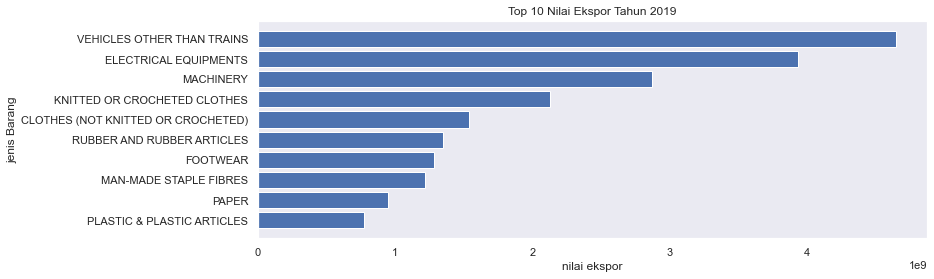

In [359]:
plt.figure(figsize=(12,4))
x = data19.sort_values(by='nilai_ekspor')['jenis_barang'].tail(10)
y = data19.sort_values(by='nilai_ekspor')['nilai_ekspor'].tail(10)
plt.barh(x,y)
plt.grid()
plt.ylabel('jenis Barang')
plt.xlabel('nilai ekspor')
plt.title('Top 10 Nilai Ekspor Tahun 2019')

In [360]:
data20 = dataset[(dataset['tahun'] == 2020)] #menampilkan data pada tahun 2019
data20

,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
392,393,JAWA BARAT,1,LIVE ANIMALS,2054691,US DOLLAR,2020
393,394,JAWA BARAT,2,MEAT,2225615,US DOLLAR,2020
394,395,JAWA BARAT,3,FISH,146675039,US DOLLAR,2020
395,396,JAWA BARAT,4,DAIRY PRODUCTS,94168703,US DOLLAR,2020
396,397,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,1979596,US DOLLAR,2020
...,...,...,...,...,...,...,...
485,486,JAWA BARAT,95,"TOYS, GAMES AND SPORTS EQUIPMENT",326742485,US DOLLAR,2020
486,487,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020
487,488,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020
488,489,JAWA BARAT,98,PEBT,0,US DOLLAR,2020


In [361]:
dataset_top_10_20 = data20.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016
(data20.head(10))

<ipython-input-361-269298f384a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_top_10_20 = data20.sort_values('nilai_ekspor',ascending=False,inplace=True) #menampilkan top 10 nilai ekspor tahun 2016


,id,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun
475,476,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,3745586329,US DOLLAR,2020
477,478,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,3363391160,US DOLLAR,2020
474,475,JAWA BARAT,84,MACHINERY,2720064157,US DOLLAR,2020
452,453,JAWA BARAT,61,KNITTED OR CROCHETED CLOTHES,1885933192,US DOLLAR,2020
455,456,JAWA BARAT,64,FOOTWEAR,1619373739,US DOLLAR,2020
431,432,JAWA BARAT,40,RUBBER AND RUBBER ARTICLES,1245145554,US DOLLAR,2020
453,454,JAWA BARAT,62,CLOTHES (NOT KNITTED OR CROCHETED),1154927400,US DOLLAR,2020
439,440,JAWA BARAT,48,PAPER,949653422,US DOLLAR,2020
446,447,JAWA BARAT,55,MAN-MADE STAPLE FIBRES,861249387,US DOLLAR,2020
430,431,JAWA BARAT,39,PLASTIC & PLASTIC ARTICLES,710231798,US DOLLAR,2020


In [362]:
group_5 = data20.groupby(['jenis_barang'])[['nilai_ekspor', 'tahun',]].sum().reset_index()
group_5

,jenis_barang,nilai_ekspor,tahun
0,AIRCRAFT AND SPACECRAFT,31606269,2020
1,"ALBUMINOIDAL SUBSTANCES, MODIFIED STARCHES, GL...",6854425,2020
2,ALUMINIUM,198242841,2020
3,ARMS AND AMMUNITION,40309,2020
4,ARTICLES OF IRON OR STEEL,248571354,2020
...,...,...,...
93,WOOD,231512704,2020
94,WOOD PULP AND WASTE,3205305,2020
95,"WOOL, ANIMAL HAIR AND WOVEN FABRIC",764895,2020
96,WORKS OF ART AND ANTIQUES,117576,2020


Text(0.5, 1.0, 'Top 10 Nilai Ekspor Tahun 2020')

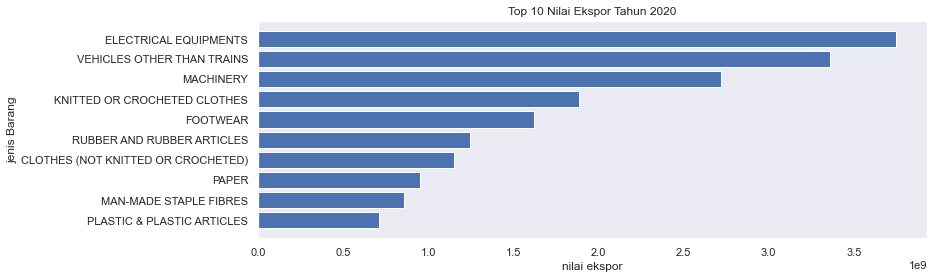

In [363]:
plt.figure(figsize=(12,4))
x = data20.sort_values(by='nilai_ekspor')['jenis_barang'].tail(10)
y = data20.sort_values(by='nilai_ekspor')['nilai_ekspor'].tail(10)
plt.barh(x,y)
plt.grid()
plt.ylabel('jenis Barang')
plt.xlabel('nilai ekspor')
plt.title('Top 10 Nilai Ekspor Tahun 2020')

In [364]:
duplicated['Ranking']=duplicated['nilai_ekspor'].rank(ascending=0,method='dense')
duplicated

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun,Ranking
0,1,32,JAWA BARAT,1,LIVE ANIMALS,404735,US DOLLAR,2016,439.0
1,2,32,JAWA BARAT,2,MEAT,668872,US DOLLAR,2016,430.0
2,3,32,JAWA BARAT,3,FISH,58383487,US DOLLAR,2016,232.0
3,4,32,JAWA BARAT,4,DAIRY PRODUCTS,12252367,US DOLLAR,2016,318.0
4,5,32,JAWA BARAT,5,NON-EDIBLE ANIMAL PARTS,864886,US DOLLAR,2016,427.0
...,...,...,...,...,...,...,...,...,...
486,487,32,JAWA BARAT,96,MISCELLANEOUS MANUFACTURED ARTICLES,216098758,US DOLLAR,2020,126.0
487,488,32,JAWA BARAT,97,WORKS OF ART AND ANTIQUES,117576,US DOLLAR,2020,462.0
488,489,32,JAWA BARAT,98,PEBT,0,US DOLLAR,2020,483.0
489,490,32,JAWA BARAT,99,PARCEL AND RETURN GOODS N.C.A.K.,10105991,US DOLLAR,2020,331.0


In [365]:
dataset_top_10 = duplicated.sort_values('nilai_ekspor',ascending=False,inplace=True)
(duplicated.head(10))



,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun,Ranking
379,380,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4643359777,US DOLLAR,2019,1.0
281,282,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4565848805,US DOLLAR,2018,2.0
183,184,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4497692614,US DOLLAR,2017,3.0
181,182,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4112883961,US DOLLAR,2017,4.0
279,280,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4091298449,US DOLLAR,2018,5.0
83,84,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4024471113,US DOLLAR,2016,6.0
377,378,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,3935456341,US DOLLAR,2019,7.0
475,476,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,3745586329,US DOLLAR,2020,8.0
477,478,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,3363391160,US DOLLAR,2020,9.0
180,181,32,JAWA BARAT,84,MACHINERY,3124117494,US DOLLAR,2017,10.0


In [366]:
dataset_top = duplicated.head(10)
dataset_top

,id,kode_provinsi,nama_provinsi,kode_hs,jenis_barang,nilai_ekspor,satuan,tahun,Ranking
379,380,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4643359777,US DOLLAR,2019,1.0
281,282,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4565848805,US DOLLAR,2018,2.0
183,184,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,4497692614,US DOLLAR,2017,3.0
181,182,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4112883961,US DOLLAR,2017,4.0
279,280,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4091298449,US DOLLAR,2018,5.0
83,84,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,4024471113,US DOLLAR,2016,6.0
377,378,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,3935456341,US DOLLAR,2019,7.0
475,476,32,JAWA BARAT,85,ELECTRICAL EQUIPMENTS,3745586329,US DOLLAR,2020,8.0
477,478,32,JAWA BARAT,87,VEHICLES OTHER THAN TRAINS,3363391160,US DOLLAR,2020,9.0
180,181,32,JAWA BARAT,84,MACHINERY,3124117494,US DOLLAR,2017,10.0


In [367]:
group_6 = dataset_top.groupby(['jenis_barang'])[['nilai_ekspor', 'tahun',]].sum().reset_index()
group_6

,jenis_barang,nilai_ekspor,tahun
0,ELECTRICAL EQUIPMENTS,19909696193,10090
1,MACHINERY,3124117494,2017
2,VEHICLES OTHER THAN TRAINS,17070292356,8074


Text(0.5, 1.0, 'Barang yang mempunyai Nilai Ekspor tinggi')

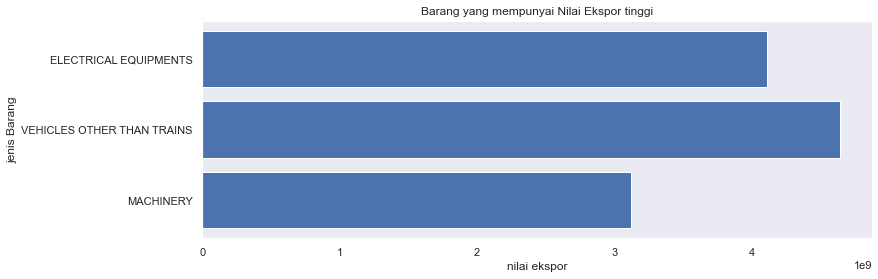

In [372]:
plt.figure(figsize=(12,4))
x = dataset_top.sort_values(by='nilai_ekspor')['jenis_barang'].tail(10)
y = dataset_top.sort_values(by='nilai_ekspor')['nilai_ekspor'].tail(10)
plt.barh(x,y)
plt.grid()
plt.ylabel('jenis Barang')
plt.xlabel('nilai ekspor')
plt.title('Barang yang mempunyai Nilai Ekspor tinggi')

([<matplotlib.patches.Wedge at 0x247991d3130>,
 [Text(1.2806674606330843, 0.31982941590105074, 'MACHINERY'),
  Text(0.9631837289426219, 0.9025946511586395, 'VEHICLES OTHER THAN TRAINS'),
  Text(0.3405864336926168, 1.2753042308345663, 'ELECTRICAL EQUIPMENTS'),
  Text(-0.4411104739202085, 1.2441147655252265, 'ELECTRICAL EQUIPMENTS'),
  Text(-1.0845613667830227, 0.7524138765877072, 'ELECTRICAL EQUIPMENTS'),
  Text(-1.3194358430920445, -0.038588287912079064, 'ELECTRICAL EQUIPMENTS'),
  Text(-1.0330688803708241, -0.821686490341281, 'ELECTRICAL EQUIPMENTS'),
  Text(-0.33817154967285473, -1.4819041814475928, 'VEHICLES OTHER THAN TRAINS'),
  Text(0.7095000668490671, -1.344250592390113, 'VEHICLES OTHER THAN TRAINS'),
  Text(1.4205494049013145, -0.5407766528193697, 'VEHICLES OTHER THAN TRAINS')],
 [Text(0.6985458876180459, 0.1744524086733004, '7.8%'),
  Text(0.5253729430596119, 0.49232435517743967, '8.4%'),
  Text(0.185774418377791, 0.6956204895461271, '9.3%'),
  Text(-0.24060571304738643, 0.678

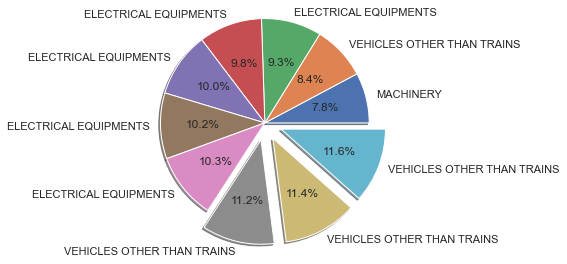

In [379]:
plt.pie(y, labels=x, radius=1.2, autopct='%0.01f%%', shadow=True, explode=[0,0,0,0,0,0,0,0.2,0.2,0.2])

<BarContainer object of 10 artists>

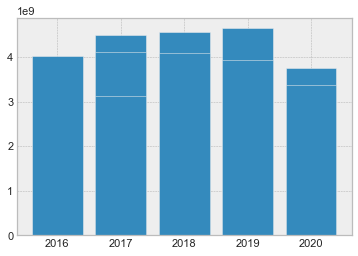

In [275]:

plt.style.use('bmh')
x=dataset_top["tahun"]
y=dataset_top["nilai_ekspor"]

plt.bar(x,y)

([<matplotlib.patches.Wedge at 0x24795dd1280>,
 [Text(1.3270923609359193, 0.5051988376327963, '2019'),
  Text(0.6628227542108185, 1.2558128827577717, '2018'),
  Text(-0.3159231297647018, 1.3844105518521865, '2017'),
  Text(-1.0330687457400873, 0.8216866596063265, '2017'),
  Text(-1.3194358394791426, 0.03858841144657829, '2018'),
  Text(-1.1667251256365514, -0.809414900535179, '2016'),
  Text(-0.441110444799601, -1.2441147758501618, '2019'),
  Text(0.36638856469333697, -1.3719181534122058, '2020'),
  Text(0.9631838768298763, -0.902594493344032, '2020'),
  Text(1.2806675280083857, -0.3198291461153764, '2017')],
 [Text(0.7663491098362349, 0.29173454004147387, '11.6%'),
  Text(0.38275680172737403, 0.7251877210291359, '11.4%'),
  Text(-0.1824344833852503, 0.7994483468442203, '11.2%'),
  Text(-0.5634920431309567, 0.4481927234216326, '10.3%'),
  Text(-0.7196922760795322, 0.02104822442540634, '10.2%'),
  Text(-0.6737426781844874, -0.46740860453439914, '10.0%'),
  Text(-0.2406056971634187, -0.6

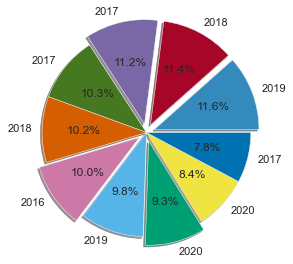

In [322]:

plt.pie(y, labels=x, radius=1.2, autopct='%0.01f%%', shadow=True, explode=[0.1,0.1,0.1,0,0,0.1,0,0.1,0,0])